# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 30.2 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 59.5 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 26.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 36.9 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 40.2 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 26.4 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 40.3 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 33.7 MB/s eta 0:00:01
     |██████████████████

In [3]:
!pip install --upgrade jupyter ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: jupyter in /root/.local/lib/python3.7/site-packages (1.0.0)
     |████████████████████████████████| 139 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 386 kB 64.4 MB/s eta 0:00:01
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbexten

In [4]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images
])

# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training set size: 60000
Test set size: 10000
Sample image shape: torch.Size([1, 28, 28])
9


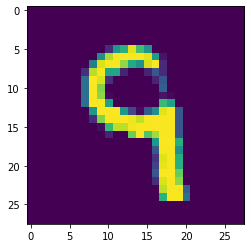

4


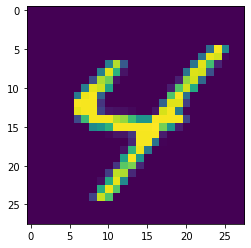

1


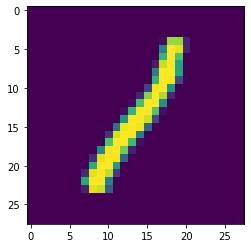

6


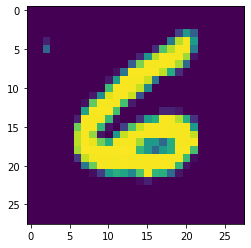

1


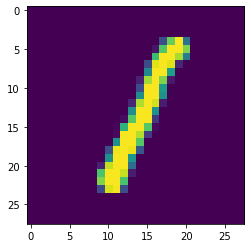

In [7]:
# Explore data
# Check the dimensions of the dataset
print("Training set size:", len(train_set))
print("Test set size:", len(test_set))

# Check the dimensions of a sample image
sample_image, sample_label = train_set[0]
print("Sample image shape:", sample_image.shape)

# Show five images from the training set
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Adjust the input size of the linear layer
        self.fc2 = nn.Linear(128, 10)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten the tensor before passing to the linear layer
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = MyModel()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model.to(device)

# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    train_losses = []  # To store the training losses
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the device
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize
            running_loss += loss.item()
            if i % 250 == 249:  # Print every 250 mini-batches
                print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 250:.3f}")
                train_losses.append(running_loss / 250)
                running_loss = 0.0
        # Calculate average loss for the epoch
        epoch_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.3f}")
        train_losses.append(epoch_loss)
        # Debugging: Print the size of the tensor after the last convolutional layer
        print(outputs.size())
        # Debugging: Print the model architecture
        print(model)
    return train_losses

# Train the model with the updated loss function
train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs=5)

# Print the model summary
def model_summary(model, input_size):
    print(model)
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")

# Usage
model_summary(model, input_size=(1, 28, 28))

Epoch [1/5], Batch [250/938], Loss: 0.413
Epoch [1/5], Batch [500/938], Loss: 0.114
Epoch [1/5], Batch [750/938], Loss: 0.089
Epoch [1/5], Loss: 0.016
torch.Size([32, 10])
MyModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
)
Epoch [2/5], Batch [250/938], Loss: 0.061
Epoch [2/5], Batch [500/938], Loss: 0.063
Epoch [2/5], Batch [750/938], Loss: 0.057
Epoch [2/5], Loss: 0.010
torch.Size([32, 10])
MyModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=

Plot the training loss (and validation loss/accuracy, if recorded).

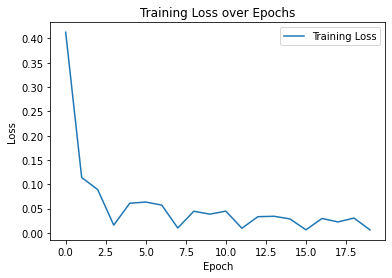

In [11]:
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
# Test the model
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f'Accuracy of the network on the test images after tuning: {accuracy:.2f}%')

Accuracy of the network on the test images after tuning: 99.06%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [13]:
# Define new learning rate
new_lr = 0.0001

# Update optimizer with new learning rate
optimizer = optim.Adam(model.parameters(), lr=new_lr)

# Train the model again with more epochs
train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs=10)

# Test the model again
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f'Accuracy of the network on the test images after tuning: {accuracy:.2f}%')

Epoch [1/10], Batch [250/938], Loss: 0.008
Epoch [1/10], Batch [500/938], Loss: 0.008
Epoch [1/10], Batch [750/938], Loss: 0.006
Epoch [1/10], Loss: 0.002
torch.Size([32, 10])
MyModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
)
Epoch [2/10], Batch [250/938], Loss: 0.004
Epoch [2/10], Batch [500/938], Loss: 0.006
Epoch [2/10], Batch [750/938], Loss: 0.005
Epoch [2/10], Loss: 0.001
torch.Size([32, 10])
MyModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kern

## Saving your model
Using `torch.save`, save your model for future loading.

In [14]:
# Define the file path where you want to save the model
model_path = 'mnist_model.pth'

# Save the model
torch.save(model.state_dict(), model_path)

print(f'Model saved to {model_path}')

Model saved to mnist_model.pth
